<a href="https://colab.research.google.com/github/mspaulette/MachineLearning/blob/main/M494_Project__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pylab import show

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as mp

from sklearn.model_selection import cross_val_score
from sklearn import datasets

from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [ ]:
Salary_data = pd.read_csv("salary.csv")

np.random.seed()
Salary_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:

Salary_data = pd.read_csv("salary.csv")

np.random.seed()
Salary_data.head()

#Salary_data.shape

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
missing_values = Salary_data.isnull().sum()   #num. of missing data points per column

missing_values[0:15]    #missing points


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [ ]:
Salary_data.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
totalCells = np.product(Salary_data.shape)      #total missing values
totalMissing = missing_values.sum()

percentMissing = (totalMissing/totalCells) *100
print(percentMissing)

#no information is missing
##Did not drop any data bc no data is misisng

0.0


In [ ]:
# Using this to drop columns [fnlwgt,capital-gain, capital-loss]-> drop()

Salary_data.drop(['fnlwgt','capital-gain','capital-loss','marital-status'], axis = 1)


,age,workclass,education,education-num,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [ ]:
# MY new Salary_data is newData

newData = Salary_data.drop(['fnlwgt','capital-gain','capital-loss'], axis = 1)
newData


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [ ]:
X = newData[['age', 'workclass','education','education-num','marital-status','occupation','relationship','race','sex','hours-per-week', 'native-country']]
Y = newData[['salary']]
#print(Y.dtypes)
#Y =Y['salary'][Y['salary']=='<=50']
#print(Y)

# Cleaning Y_train
pf = pd.DataFrame(Y, columns=['salary'])
print(pf)
p_subset = pf[['salary']]
p = pd.get_dummies(p_subset)

# Replace the two salary columns with a single column
p['salary'] = p['salary_ <=50K'].apply(lambda x: 0 if x == 0 else 1)
p.drop(['salary_ <=50K', 'salary_ >50K'], axis=1, inplace=True)
Y = p['salary'].ravel()
Y = pd.DataFrame(Y, columns=['salary'])
print(Y.shape)
print(X.shape)
print(Y.dtypes)
print(Y)

#Separate X one to get dummies or to keep the original values
df1 = X[['age', 'education-num','hours-per-week']]

df2 = X[[ 'workclass','education','marital-status','occupation','relationship','race','sex', 'native-country']]

df2 = pd.get_dummies(df2)

X = pd.concat([df1, df2], axis =1)

       salary
0       <=50K
1       <=50K
2       <=50K
3       <=50K
4       <=50K
...       ...
32556   <=50K
32557    >50K
32558   <=50K
32559   <=50K
32560    >50K

[32561 rows x 1 columns]
(32561, 1)
(32561, 11)
salary    int64
dtype: object
       salary
0           1
1           1
2           1
3           1
4           1
...       ...
32556       1
32557       0
32558       1
32559       1
32560       0

[32561 rows x 1 columns]


In [ ]:

print(X.dtypes)

age                                int64
education-num                      int64
hours-per-week                     int64
workclass_ ?                       uint8
workclass_ Federal-gov             uint8
                                   ...  
native-country_ Thailand           uint8
native-country_ Trinadad&Tobago    uint8
native-country_ United-States      uint8
native-country_ Vietnam            uint8
native-country_ Yugoslavia         uint8
Length: 105, dtype: object


In [ ]:
X = newData[['age', 'workclass','education','education-num','marital-status','occupation','relationship','race','sex','hours-per-week', 'native-country']]
Y = newData[['salary']]
#print(Y.dtypes)
#Y =Y['salary'][Y['salary']=='<=50']
#print(Y)

# Cleaning Y_train
pf = pd.DataFrame(Y, columns=['salary'])
p_subset = pf[['salary']]
p = pd.get_dummies(p_subset)

# Replace the two salary columns with a single column
p['salary'] = p['salary_ <=50K'].apply(lambda x: 0 if x == 0 else 1)
p.drop(['salary_ <=50K', 'salary_ >50K'], axis=1, inplace=True)
Y = p['salary'].ravel()
Y = pd.DataFrame(Y, columns=['salary'])
#print(Y.shape)
#print(X.shape)
#print(Y.dtypes)
#print(Y)


df1 = X[['age', 'education-num','hours-per-week']]

df2 = X[[ 'workclass','education','marital-status','occupation','relationship','race','sex', 'native-country']]

df2 = pd.get_dummies(df2)

X = pd.concat([df1, df2], axis =1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 )

#quant_val =['age', 'education-num','hours-per-week']

#X_train[quant_val] = (X_train[quant_val]-X_train[quant_val].mean())/X_train[quant_val].std()
#X_test[quant_val] = (X_test[quant_val]-X_train[quant_val].mean())/X_train[quant_val].std()


#df1 = (df1 -df1.mean())/df1.std()
#print(X_train.head())
#print(X_test.head())
#print(Y_train.head())
#print(Y_test.head())
#print(X_train.shape)
#print(Y_train.shape)
#print(X_test.shape)
##print(Y_test.shape)
#print(df.info())
#print(df.dtypes)
#print(df.head())
#df = pd.DataFrame(X_train, columns=['age', 'workclass', 'education', 'education-num', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week'])
#df_subset = df[['age', 'workclass', 'education', 'education-num', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week']]


#X_train
#len(X_train)
#len(X_test)
#9769/32561
#print(df1.head())
#print(df2.head())
#print(Y_train.shape)
print(np.sum(Y_train))
19783/26048
print(Y_test.shape)
print(np.sum(Y_test))

salary    19766
dtype: int64
(6513, 1)
salary    4954
dtype: int64


# Random Forest Model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [ ]:

Tree_values = [10,50,100, 500, 1000,5000]  # specify the range of tree values to try
bestTree = None
bestScore = 0
Score = []
accuracy2 = []
np.random.seed(42) #the random forest wont print out the same
for C in Tree_values:

    randF = RandomForestClassifier(criterion= 'entropy', max_leaf_nodes=6, n_estimators=C, max_depth=10)
    randF.fit( X_train, Y_train)
    cv = cross_val_score(randF, X_train, Y_train, cv=5)  # perform cross-validation
    accuracy2 = np.mean(cv)  # compute mean score across all folds
    Score.append(accuracy2)
biggest_val_position = Score.index(max(Score))
optim_value = Tree_values[biggest_val_position]
print(optim_value)

In [ ]:
print(optim_value)

1000


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a new random forest model with the entire training data
randF = RandomForestClassifier(criterion='entropy', max_leaf_nodes=1000, n_estimators=2500, max_depth=200, random_state=42)
randF.fit(X_train, Y_train)

# Evaluate/make predictions on the model on the testing data
Y_pred = randF.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy score on the testing data: {:.2f}%".format(accuracy * 100))


<ipython-input-37-2f6558d6a3fc>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randF.fit(X_train, Y_train)


Accuracy score on the testing data: 83.26%


In [ ]:
# generate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion matrix:")
print(conf_matrix)

Confusion matrix:
[[ 841  673]
 [ 417 4582]]


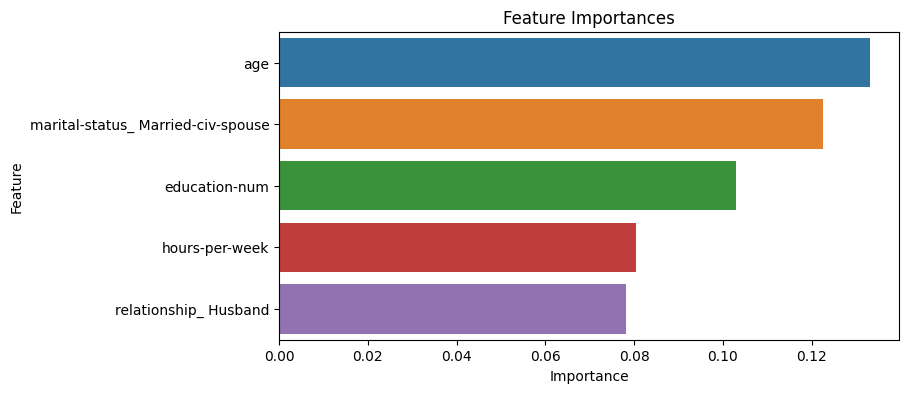

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# plot feature importances
feat_importances = pd.Series(randF.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.nlargest(5) # select top 5 features
plt.figure(figsize=(8,4))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


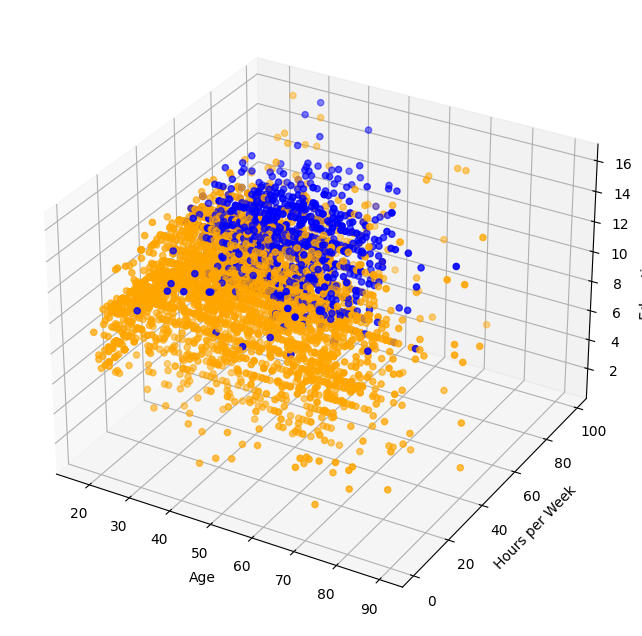

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xs = X_test['age']
ys = X_test['hours-per-week']
zs = X_test['education-num']
colors = ['blue' if y == 0 else 'orange' for y in Y_pred]

ax.scatter(xs, ys, zs, c=colors)

ax.set_xlabel('Age')
ax.set_ylabel('Hours per Week')
ax.set_zlabel('Education Num')

plt.show()


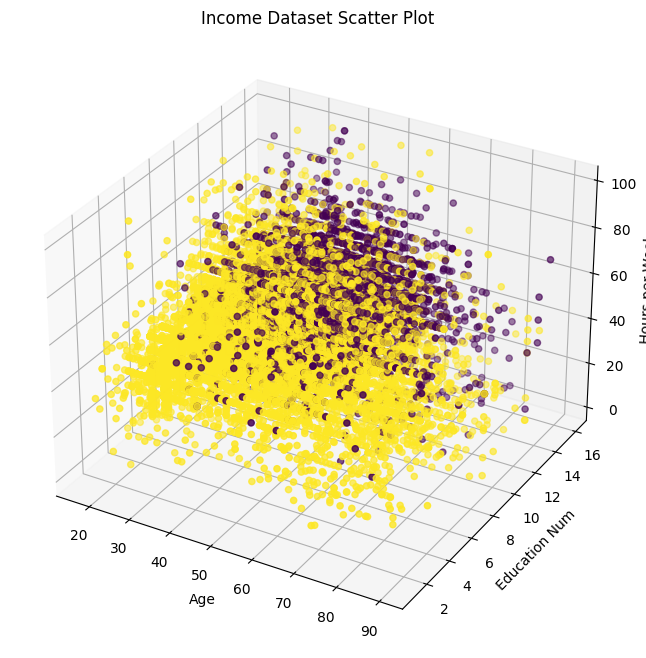

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

x = X_train['age']
y = X_train['education-num']
z = X_train['hours-per-week']
c = Y_train['salary']

ax.scatter(x, y, z, c=c, marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Education Num')
ax.set_zlabel('Hours per Week')
ax.set_title('Income Dataset Scatter Plot')

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

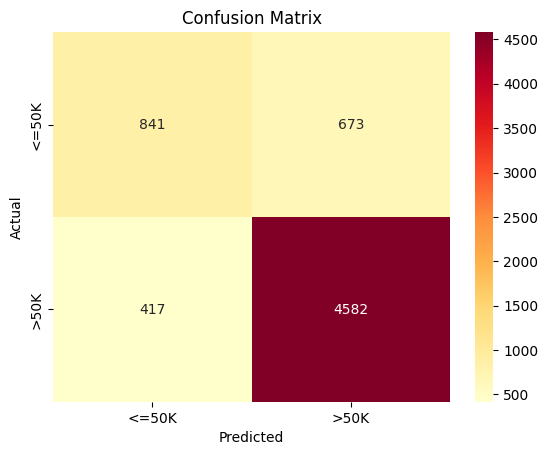

In [ ]:

# create heatmap of confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='YlOrRd', fmt='g', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

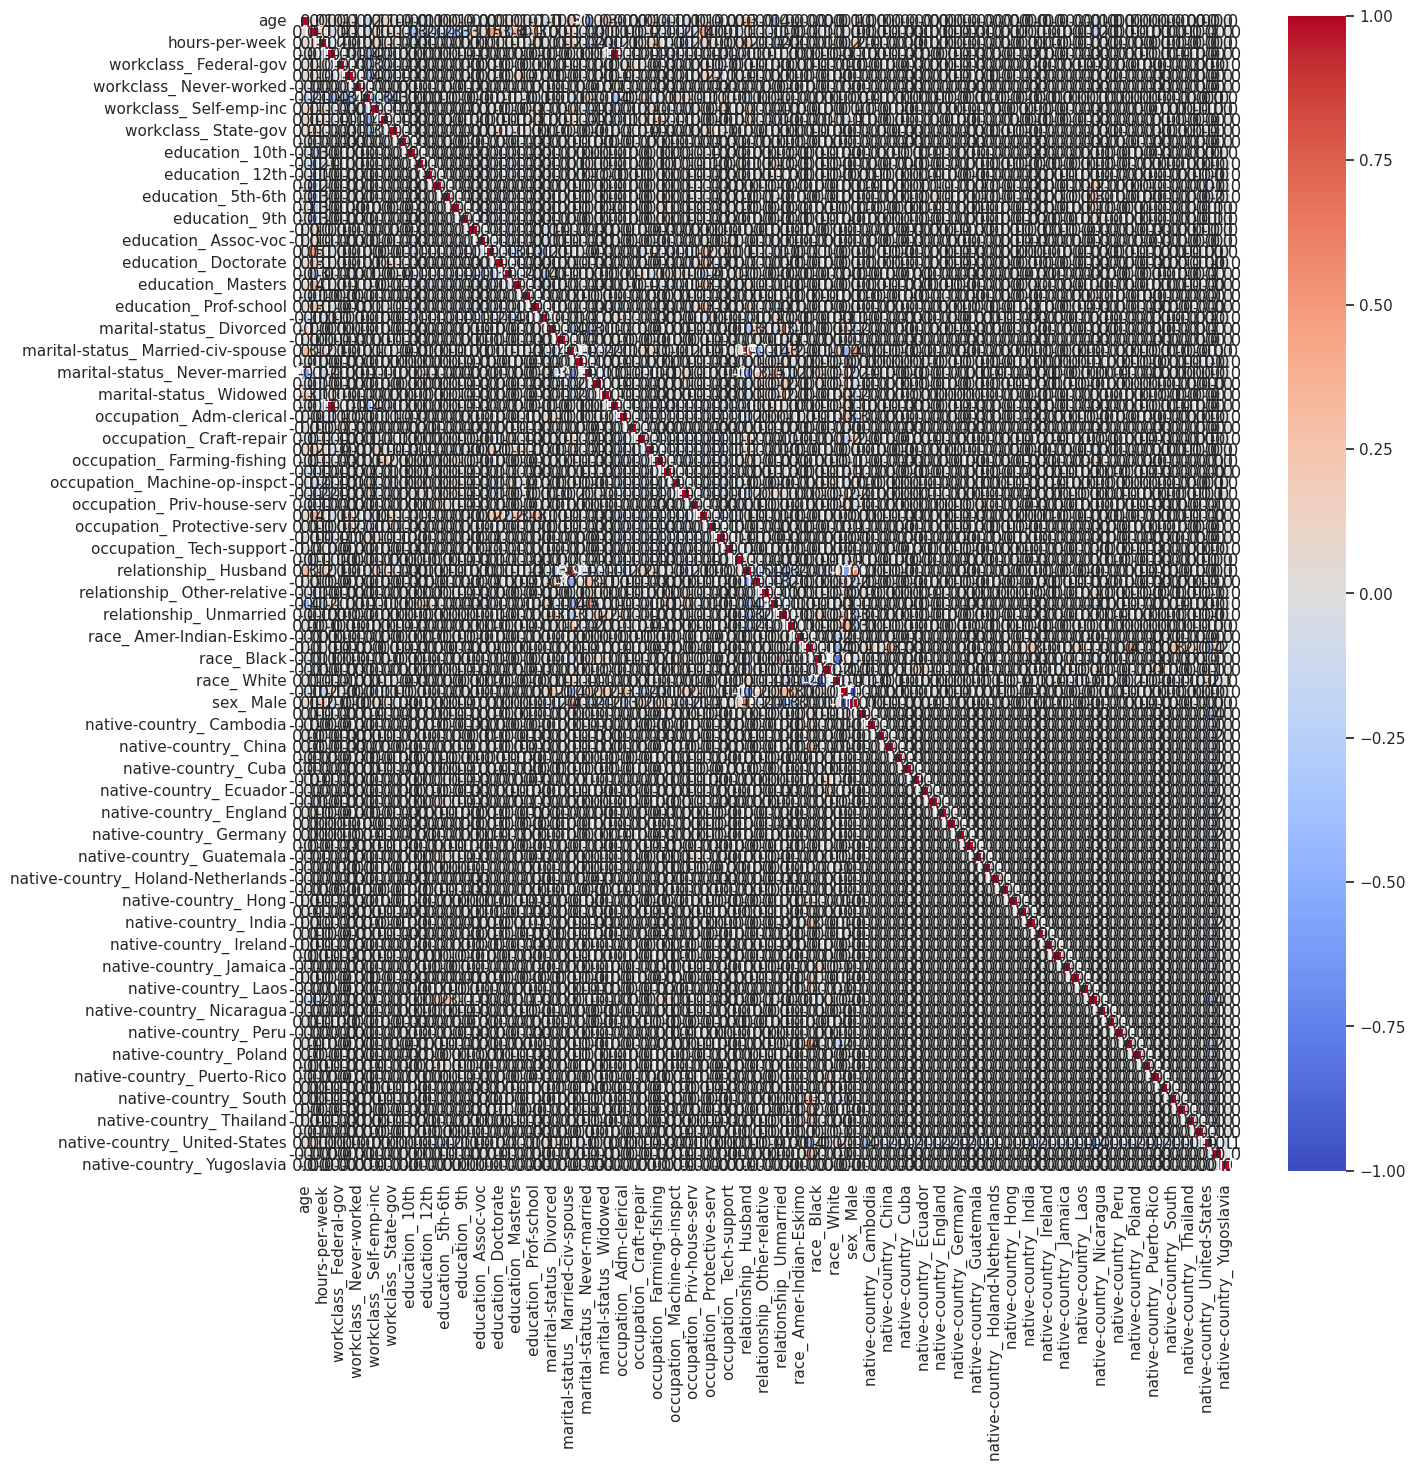

In [ ]:
#Conclusion:
#The Random Forest model performance, perhaps if we had individuals with income of more than 50K the model would have perfomed more accurately.

sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(X.corr(), annot=True, linewidth=.5, vmin=-1, cmap='coolwarm', fmt=".1f");

In [ ]:
#summary of model performance for optimized model
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.67      0.56      0.61      1514
           1       0.87      0.92      0.89      4999

    accuracy                           0.83      6513
   macro avg       0.77      0.74      0.75      6513
weighted avg       0.82      0.83      0.83      6513



# SVM Model


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [ ]:
#Create SVM and fit
SVM = SVC(kernel='rbf', C=1, gamma=0.1) #radial basis Function(rbf) kernel, regularization parameter C=1, and kernel coeff gamma=0.1
SVM.fit(X_train, Y_train.values.ravel())


SVC(C=1, gamma=0.1)

In [ ]:
#Perform Cross Validation
C = [1.5 + 0.1*i for i in range(20)]
train_accuracy =[]
val_accuracy =[]


for i in C:
  SVM  = SVC(kernel ='rbf', C =i )
  scores = cross_val_score(SVM, X_train, Y_train, cv=5, scoring='accuracy')
  SVM.fit(X_train, Y_train)
  train_accuracy.append(SVM.score(X_train, Y_train))
  val_accuracy.append(np.mean(scores))
  #train_error.append(1- SVM.score(Y_train, X_train))

print(train_accuracy)
print(val_accuracy)

#print('Cross-validation scores:', scores)
#print('Mean accuracy:', np.mean(scores))

# Evaluate the classifier on the test set


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[0.8282017813267813, 0.8284321253071253, 0.828585687960688, 0.8287392506142506, 0.8288544226044227, 0.8292383292383292, 0.8293151105651105, 0.8295838452088452, 0.8295454545454546, 0.8293151105651105, 0.8295838452088452, 0.8298525798525799, 0.8299677518427518, 0.8305052211302212, 0.8306203931203932, 0.8310042997542998, 0.8308507371007371, 0.8308123464373465, 0.8310042997542998, 0.8311578624078624]
[0.82570618768859, 0.8260133041550336, 0.826435591138768, 0.8267426633882227, 0.8269346167068734, 0.8271649430024588, 0.8274720815773969, 0.8275104692933277, 0.8277024299814768, 0.8279711513624912, 0.8283550506302948, 0.8284318039536622, 0.8289692761936838, 0.828930895847251, 0.8291996024892692, 0.8291611852953455, 0.8291611779258474, 0.8291995582722802, 0.8294298993068618, 0.8295450624546546]


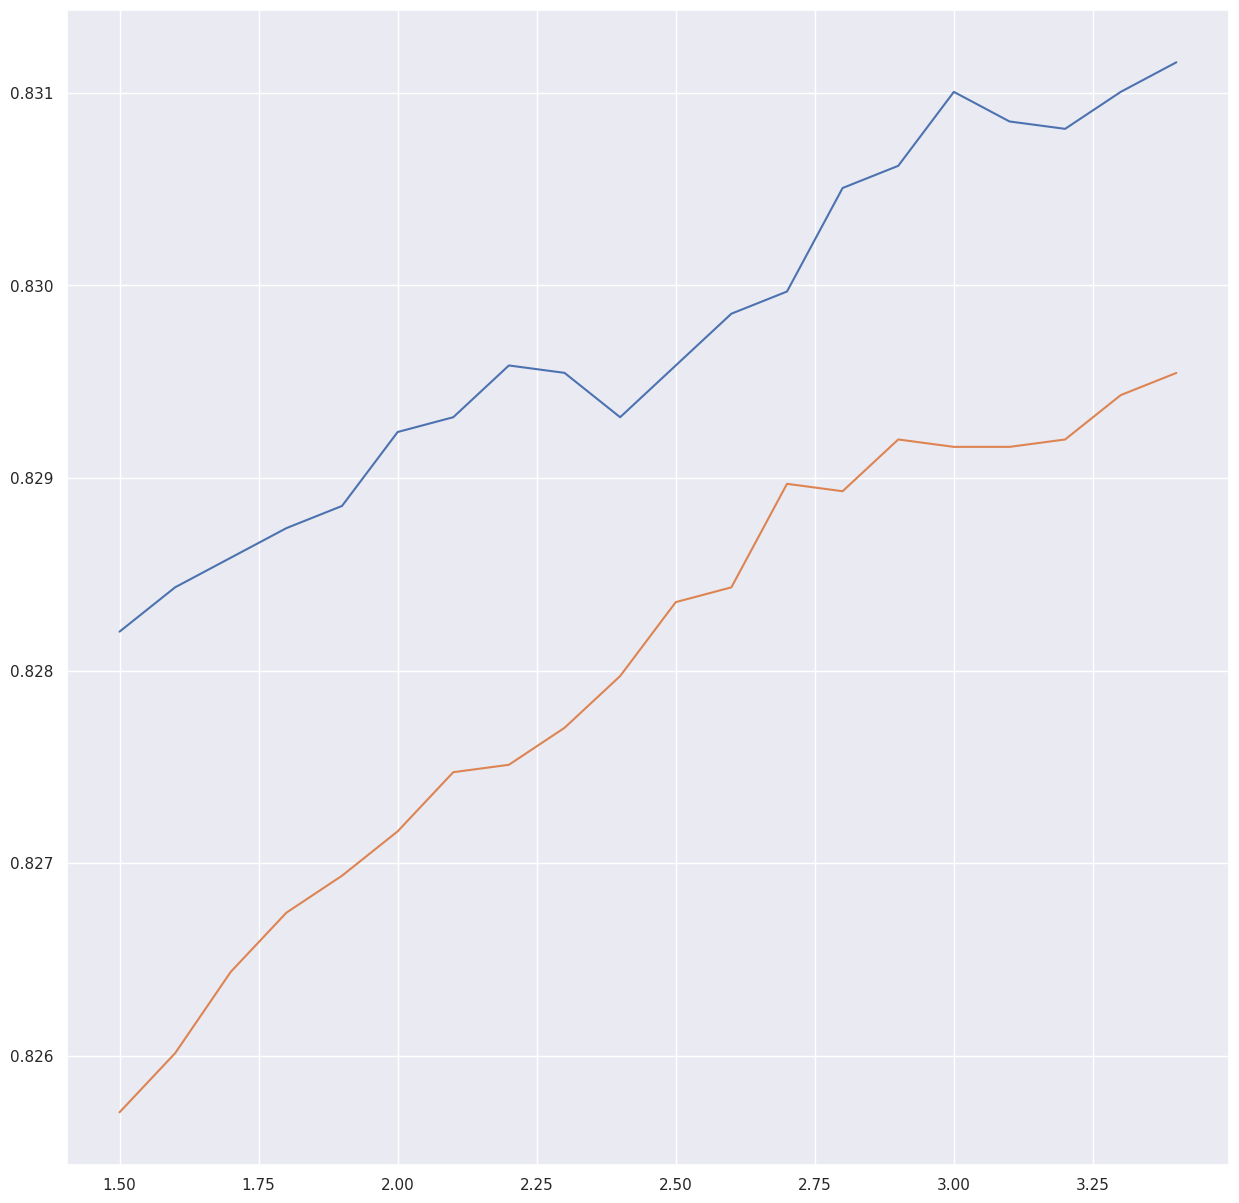

In [ ]:
plt.plot(C, train_accuracy)
plt.plot(C, val_accuracy)
plt.show()

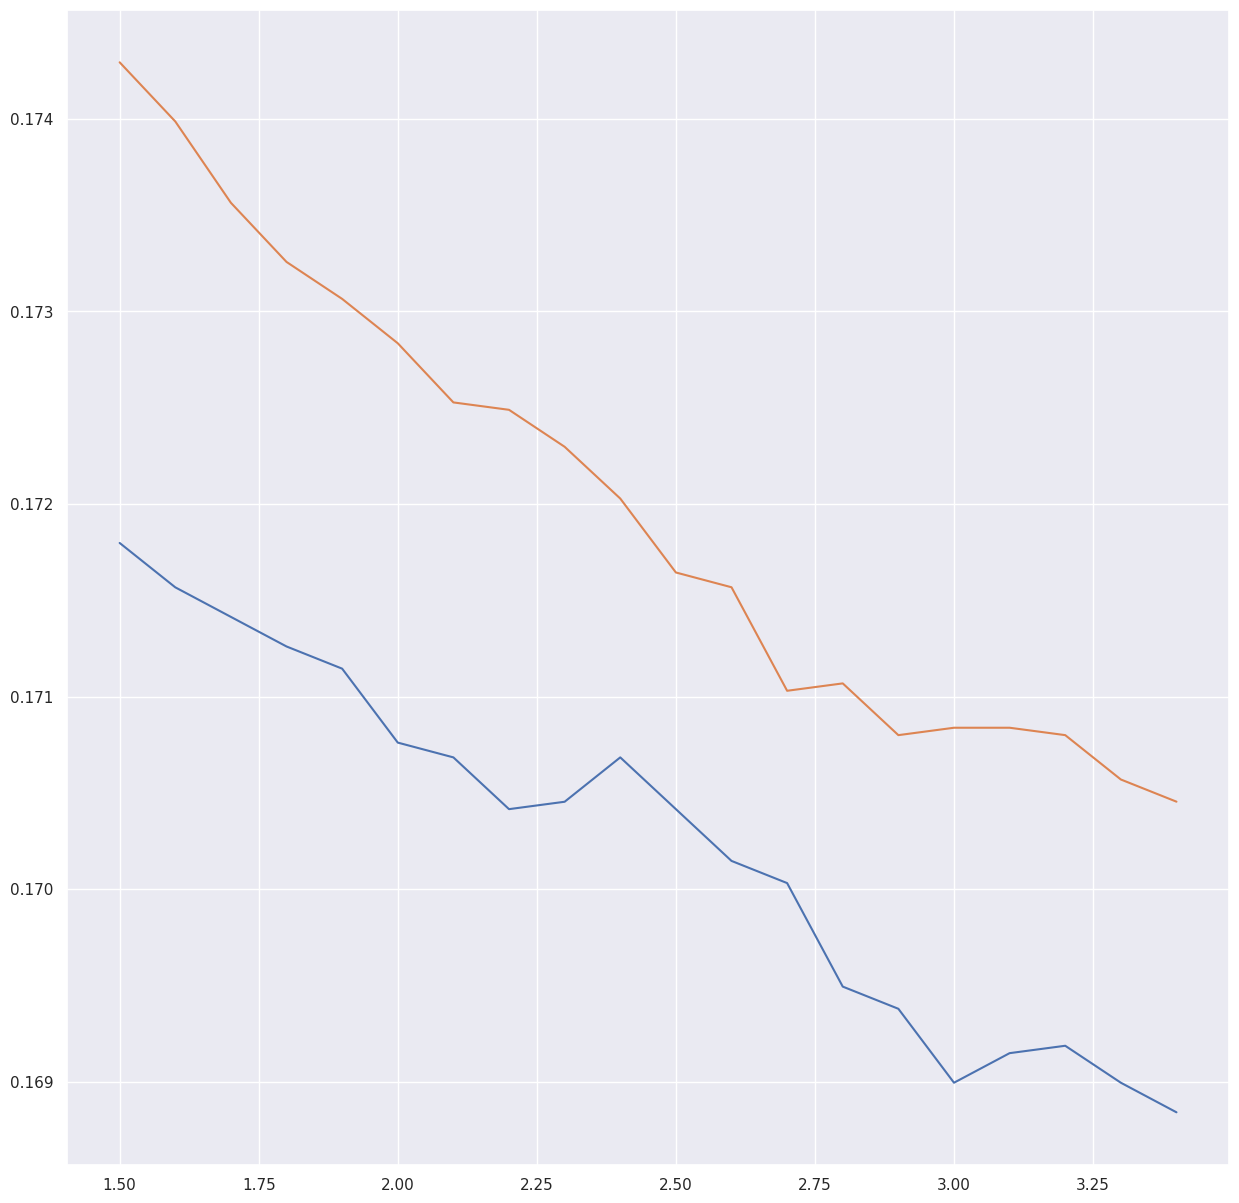

In [ ]:
train_error = [1- i for i in train_accuracy]
val_error = [1- i for i in val_accuracy]

plt.plot(C, train_error)
plt.plot(C, val_error)
plt.show()

In [ ]:
Y_pred2 = SVM.predict(X_test)
acc = accuracy_score(Y_test, Y_pred2)
print('Test accuracy:', acc)

Test accuracy: 0.8406264394288346


In [ ]:
# generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred2)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[ 773  749]
 [ 289 4702]]


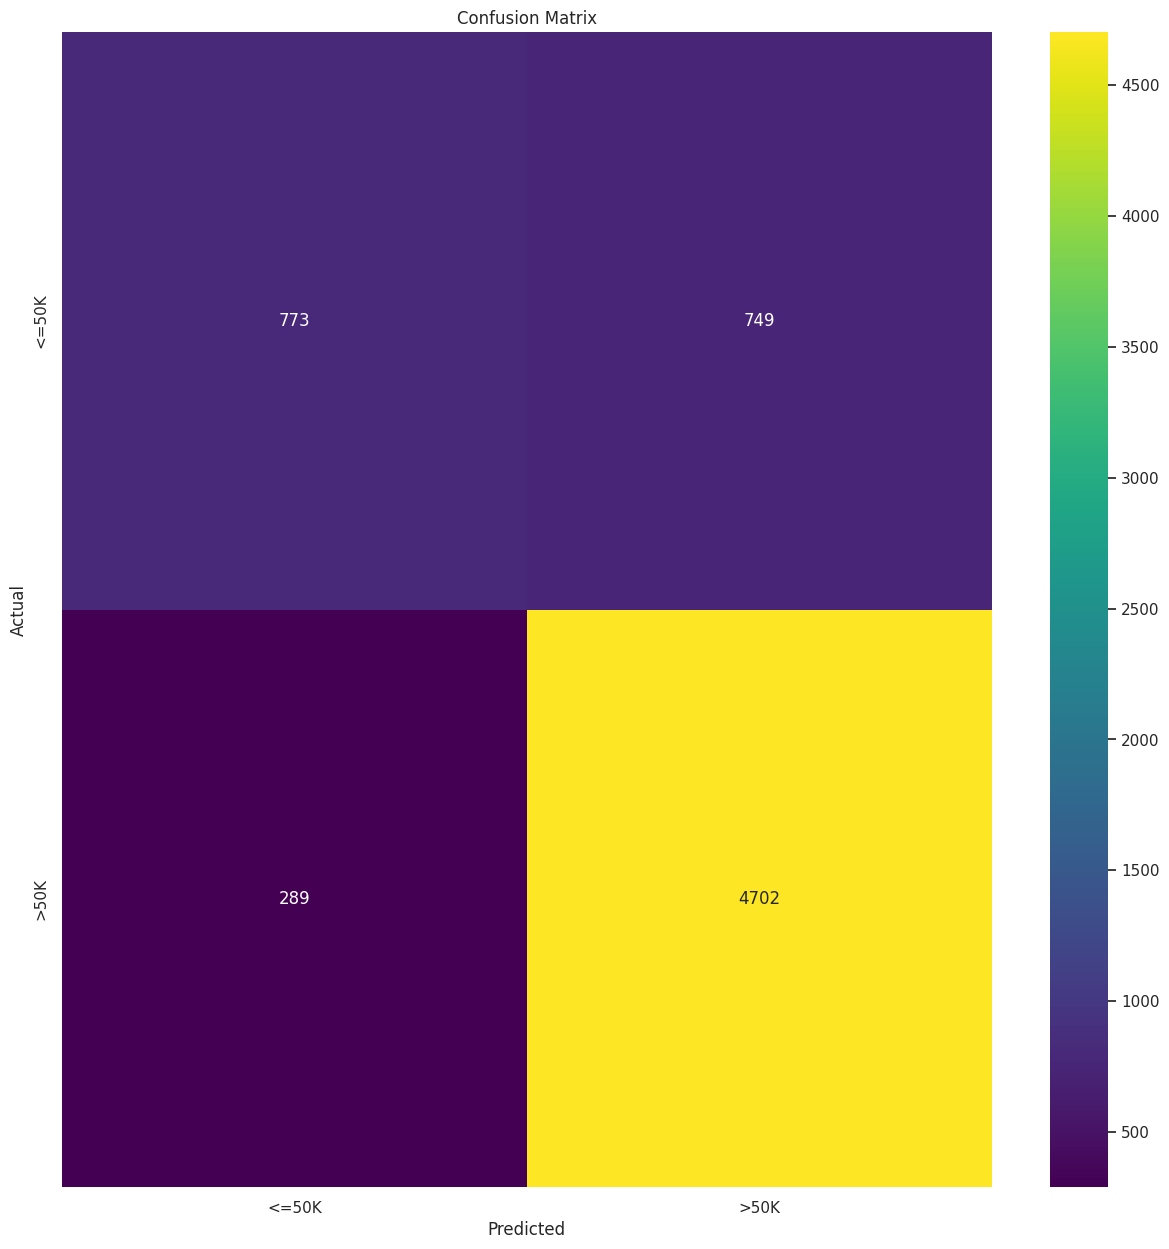

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#summary of model performance for optimized model
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred2))


              precision    recall  f1-score   support

           0       0.73      0.51      0.60      1522
           1       0.86      0.94      0.90      4991

    accuracy                           0.84      6513
   macro avg       0.80      0.72      0.75      6513
weighted avg       0.83      0.84      0.83      6513



# LDA Model

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
#LDA and fit model
LDA = LinearDiscriminantAnalysis(solver='svd',tol=0.0001)
LDA.fit(X_train.values, Y_train.values.ravel())


LinearDiscriminantAnalysis()

In [ ]:
#cv 5-fold on the training data
scores = cross_val_score(LDA, X_train, Y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average score: {scores.mean():.2f}")

Y_pred = LDA.score(X_test, Y_test)
print('Test accuracy:', Y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validation scores: [0.83819578 0.83128599 0.83090211 0.83010175 0.82376656]
Average score: 0.83
Test accuracy: 0.8413941348073085


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


In [ ]:

#predition on test data
Y_pred = LDA.predict(X_test)
print(Y_pred)

[1 1 1 ... 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
#confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion matrix:\n", conf_matrix)


Confusion matrix:
 [[ 865  657]
 [ 376 4615]]


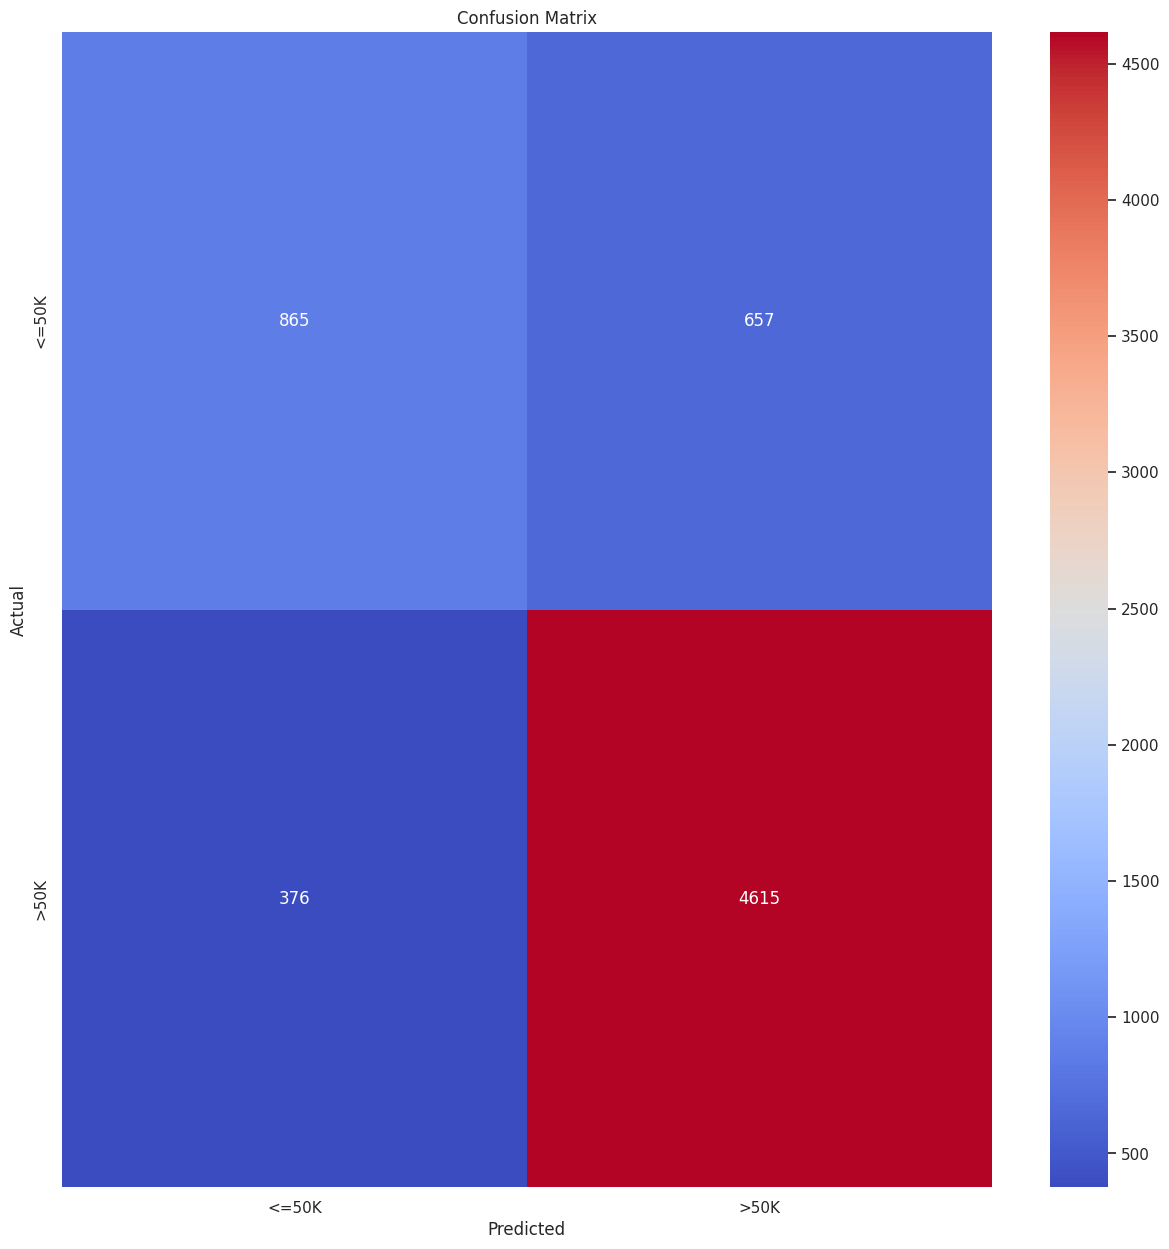

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create heatmap of confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='g', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
#summary of model performance for optimized model
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.70      0.57      0.63      1522
           1       0.88      0.92      0.90      4991

    accuracy                           0.84      6513
   macro avg       0.79      0.75      0.76      6513
weighted avg       0.83      0.84      0.84      6513



# QDA Model


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.4)
QDA.fit(X_train, Y_train.values.ravel())



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(reg_param=0.4)

In [ ]:
#cv
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

score = cross_val_score(QDA,X_train,Y_train,cv=5)

Y_pred = QDA.score(X_test,Y_test)
print("Accuracy:", Y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

Accuracy: 0.8243512974051896


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
from sklearn.metrics import confusion_matrix
# Fit the QDA model on the training data
QDA.fit(X_train, Y_train)
Y_pred = QDA.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(cm)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Confusion Matrix:
[[1111  448]
 [ 696 4258]]


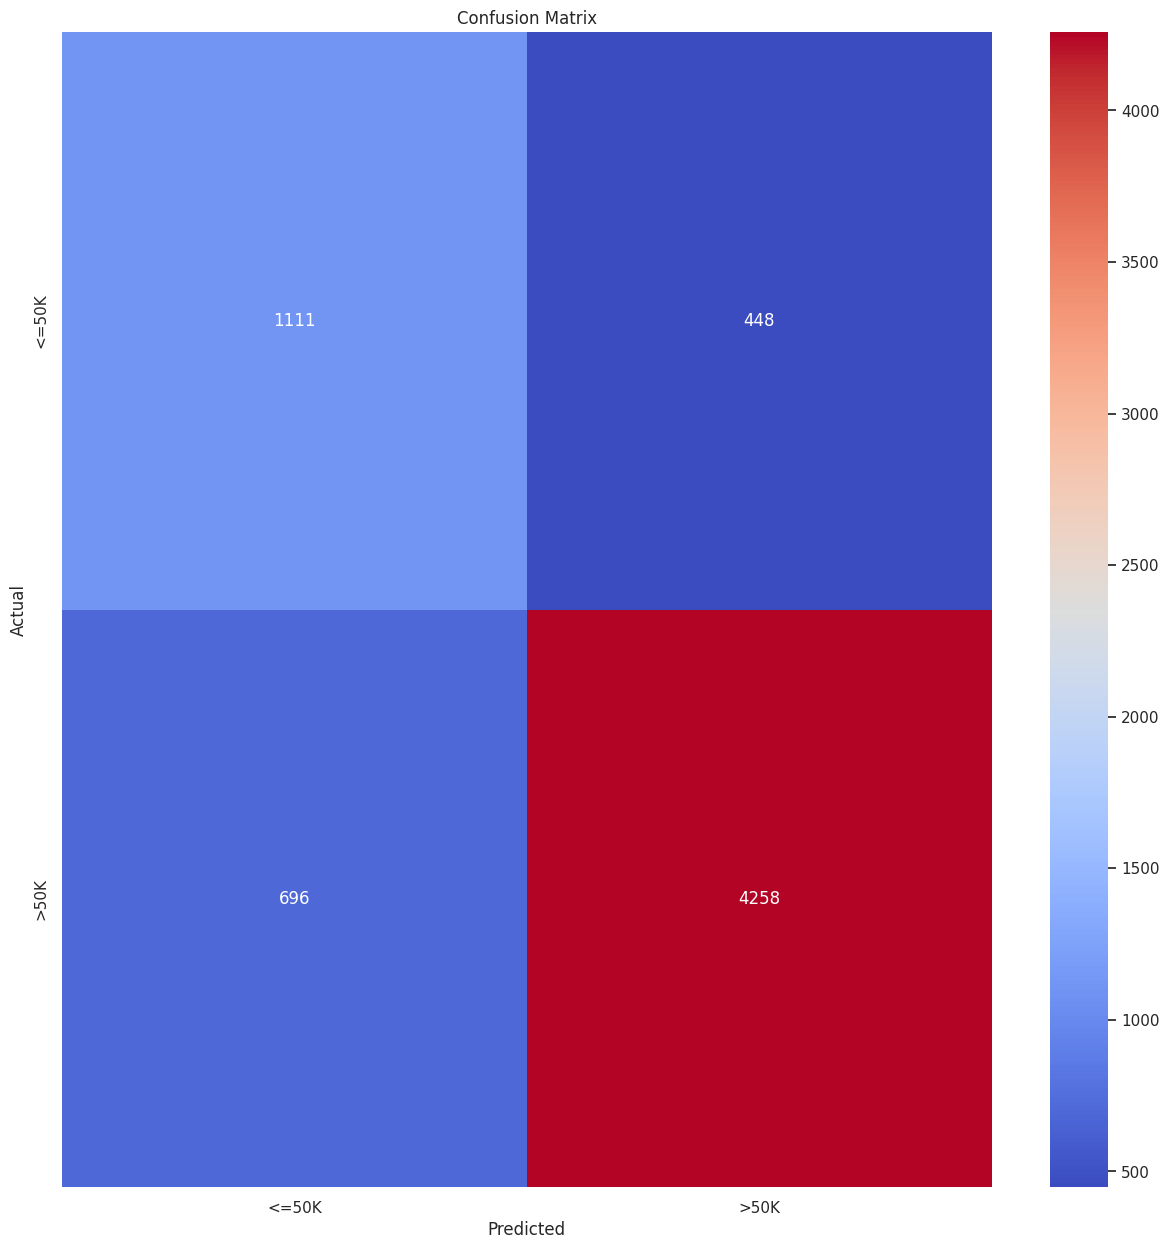

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(Y_test, Y_pred)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.71      0.66      1559
           1       0.90      0.86      0.88      4954

    accuracy                           0.82      6513
   macro avg       0.76      0.79      0.77      6513
weighted avg       0.84      0.82      0.83      6513



In [ ]:
###
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the logistic regression model
logistic_regression = LogisticRegression()

# Fit the model on the training data
logistic_regression.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = logistic_regression.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.833870720098265


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


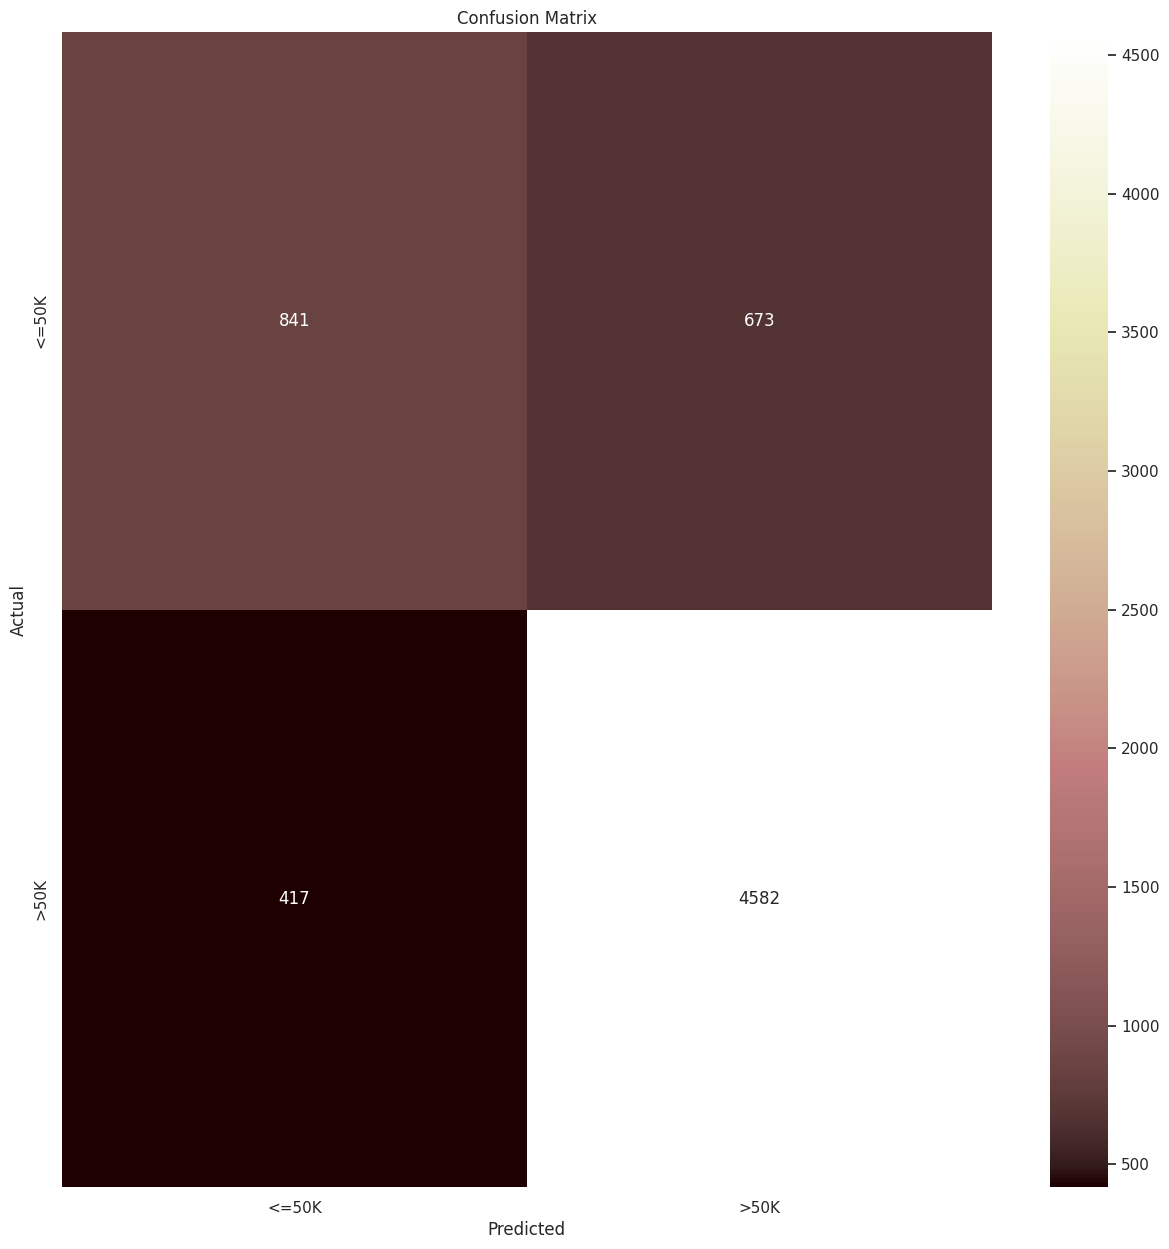

In [ ]:
# create heatmap of confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='pink', fmt='g', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#summary of model performance for optimized model
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.55      0.62      1571
           1       0.87      0.92      0.89      4942

    accuracy                           0.83      6513
   macro avg       0.78      0.74      0.75      6513
weighted avg       0.83      0.83      0.83      6513

